# Неустойчивые орбиты вокруг точки $L_1$
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- константы для системы уравнений и метод интегрирования необходимо выбрать самостоятельно в [таблице вариантов](https://docs.google.com/spreadsheets/d/1RvryyiQSz1TTAlwLxOuwmIAaZUZd2cdftZa7yHMPKBw/edit?usp=sharing) так, чтобы не было повторений
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. ~~Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка~~:

    - ~~функция для расчета одного шага размера $h$~~
    - ~~функция для расчета $n$ шагов размера $h$ (1)~~
    - ~~подготовить таблицу Бутчера из `Tracker Component Library` (определяется вариантом задания)~~


2. ~~Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$:~~

    - ~~модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей~~
    - ~~функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени~~
    
        - $d$ = $90\%$ расстояния от $L_1$ до малого массивного тела 
        - $x_{left} = x_{L1} - d$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. ~~Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:~~
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $x_{min} = x_{L1} - d / 3$
        - $x_{max} = x_{L1} + d / 3$
        - $z_{min} = 0.0$
        - $z_{max} = d / 3$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. ~~Вычислить начальные скорости и константы Якоби на заданных решетках~~
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = \pi / 180$ - шаг по времени `t`
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $[-1.0, 1.0]$ - начальный отрезок для уточнения скоростей методом бисекции (вероятно для некоторых систем этот отрезок не подойдет)


6. ~~Измерить время вычислений~~


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин (начальная скорость, константа Якоби):

    - карты должны строиться по сохраненным данным, чтобы отрисовку можно было запустить без повторного выполнения расчетов
    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - карты построены по временным данным (не сохраненным) - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)}$

In [1]:
import numpy as np
from numba import njit, jit, cfunc, prange
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
from tqdm import trange, tqdm
import time
from func import rk7_step, rk7_nsteps, get_plane, bisect_custom, v0, jac, calculate
from orbits import crtbp_ode
#import logging

jkw = dict(cache=True)

#logging.basicConfig(level=logging.DEBUG)

In [4]:
# Таблица Бутчера для RK5(4)7FM from Dormand and Prince0p-9-
But = np.array([[ 0,         0,          0,          0,          0,              0,    0],
                 [1/5,       0,          0,          0,          0,              0,    0],
                 [3/40,      9/40,       0,          0,          0,              0,    0],
                 [44/45,     -56/15,     32/9,       0,          0,              0,    0],
                 [19372/6561,-25360/2187,64448/6561, -212/729,   0,              0,    0], 
                 [9017/3168, -355/33,    46732/5247, 49/176,     -5103/18656,    0,    0],
                 [35/384,    0,          500/1113,   125/192,    -2187/6784,     11/84,0]])
c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1])
bOrderMain = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]) # b

In [5]:
# рассчитаем координату точки L1 для системы СОЛНЦЕ-МАРС

# константы системы
mu2 = 3.22758932576927e-07
mu1 = 1 - mu2
R = 228000000  # км, среднее расстояние СОЛНЦЕ-МАРС
mc = np.array([mu2])

def g(x: float, mc: np.ndarray) -> float: 
    s = np.array([x, 0., 0., 0., 0., 0.])
    return crtbp_ode(0., s, mc)[3]

xL1 = newton(g, 0.75 * mu1, args=(mc,), tol=1e-12)

(mu1 - xL1) * R # км, расстояние L1-Марс

1082672.3890692275

**Сделаем проверку, что все написанное работает правильно - построим пример из семинара, используя переписанные функции.**

In [4]:
d = (mu1 - xL1) * 0.9
xleft = xL1 - d
xright = xL1 + d
h = 0.001721420632103996 * (686.94 / 365.25)  # nd, одни сутки, шаг по времени 
                                            # (рассчитано как 1 сутки на земле * год на марсе / год на земле)
h = np.pi / 180
pl = np.array([xleft, xright])
h

0.017453292519943295

In [5]:
s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, 0.003

arr0 = rk7_nsteps(crtbp_ode, 0., s0, h, mc, 1000, But, bOrderMain, c, pl)

In [6]:
s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, -0.00255

arr1 = rk7_nsteps(crtbp_ode, 0., s0, h, mc, 1000, But, bOrderMain, c, pl)

Text(0, 0.5, 'y, nd')

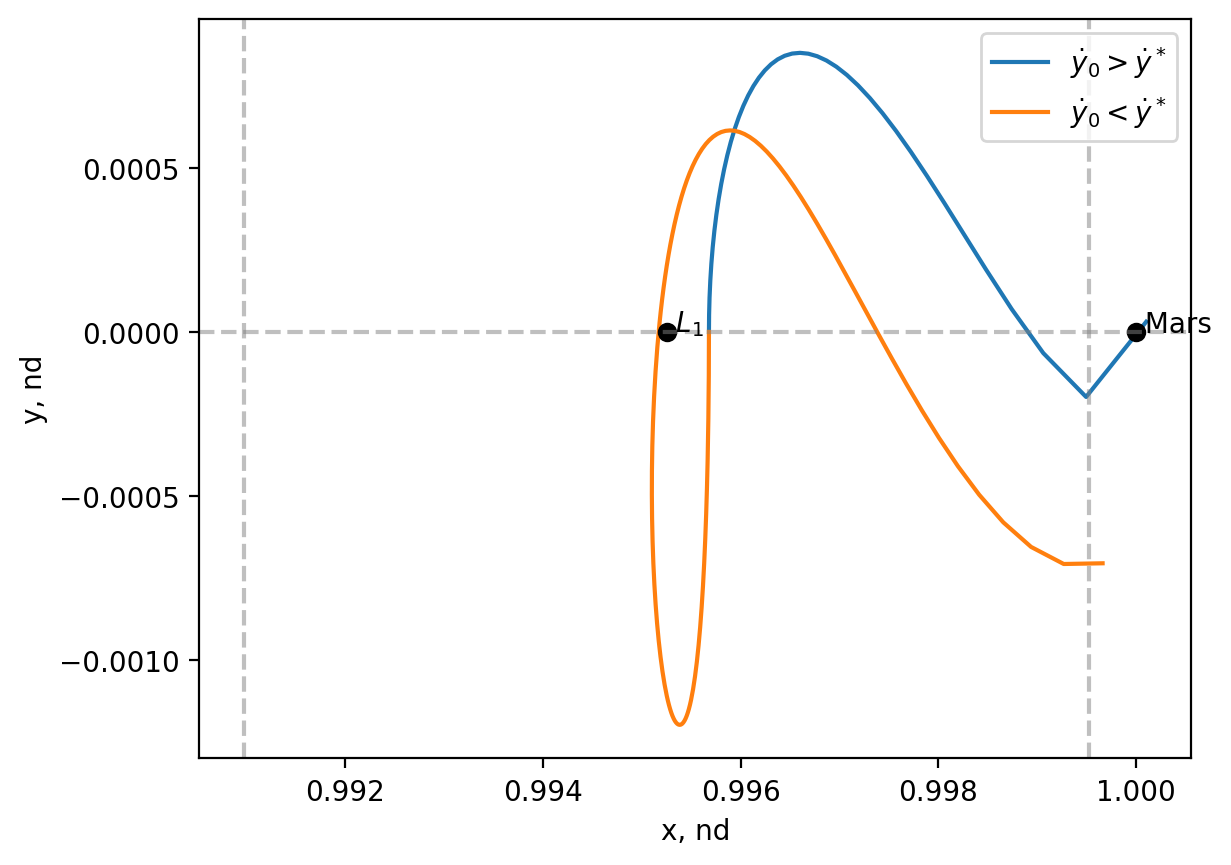

In [7]:
# График на плоскости XOY

plt.figure(dpi=200)

# траектории
plt.plot(arr0[:, 1], arr0[:, 2], label='$\dot{y}_0 > \dot{y}^*$')
plt.plot(arr1[:, 1], arr1[:, 2], label='$\dot{y}_0 < \dot{y}^*$')

# точка L1
plt.plot(xL1, 0., 'ok')
plt.text(xL1, 0., ' $L_1$')

# Земля
plt.plot(mu1, 0., 'ok')
plt.text(mu1, 0., ' Mars')

# Плоскости
plt.axvline(xleft, ls='--', color='gray', alpha=0.5)
plt.axvline(xright, ls='--', color='gray', alpha=0.5)

# Ось OX
plt.axhline(0., ls='--', color='gray', alpha=0.5)

plt.legend()

plt.xlabel('x, nd')
plt.ylabel('y, nd')

In [6]:
# обновленные константы
mu2 = 3.22758932576927e-07
mu1 = 1 - mu2
R = 228000000  # км, среднее расстояние СОЛНЦЕ-МАРС
n = 5000
mc = np.array([mu2])
d = (mu1 - xL1) * 0.9
xleft = xL1 - d
xright = xL1 + d
h = np.pi / 180.
pl = np.array([xleft, xright])
s = np.zeros(6)

xmin = xL1 - d/3.
xmax = xL1 + d/3.
zmin = 0.
zmax = d/3.

In [9]:
calculate(10, np.array([xmin, xmax]), np.array([zmin, zmax]), h, mc, n, But, bOrderMain, c, pl)

C:\Users\rybak\Desktop\Python_Seminars\3 курс\homeworks\Orbits\func.py:115: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  v1 = v0(crtbp_ode, s_n, h, mc, n, But, b, c, pl)
C:\Users\rybak\Desktop\Python_Seminars\3 курс\homeworks\Orbits\func.py:115: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  v1 = v0(crtbp_ode, s_n, h, mc, n, But, b, c, pl)
C:\Users\rybak\Desktop\Python_Seminars\3 курс\homeworks\Orbits\func.py:115: NumbaWarning: Cannot cache compiled function "v0" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  v1 = v0(crtbp_ode, s_n, h, mc, n, But, b, c, pl)
C:\Users\rybak\Desktop\Python_Seminars\3 курс\homeworks\Orbits\func.py:104: NumbaWarning: Cannot cache compiled function "calculate" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(parallel=True, **jkw)


(array([[3.00008151, 3.00008132, 3.00008076, 3.00007984, 3.00007855,
         3.00007693, 3.00007498, 3.00007273, 3.0000702 , 3.00006828],
        [3.00012061, 3.00012033, 3.0001195 , 3.00011813, 3.00011621,
         3.00011379, 3.00011087, 3.00010748, 3.00010367, 3.00009947],
        [3.00016603, 3.00016578, 3.00016502, 3.00016376, 3.00016198,
         3.00015967, 3.00015682, 3.00015341, 3.00014941, 3.00014482],
        [3.00019196, 3.00019179, 3.00019128, 3.00019043, 3.00018922,
         3.00018766, 3.00018572, 3.00018339, 3.00018065, 3.00017747],
        [3.00020154, 3.00020142, 3.00020106, 3.00020046, 3.00019962,
         3.00019852, 3.00019716, 3.00019554, 3.00019363, 3.00019142],
        [3.00020168, 3.0002016 , 3.00020134, 3.0002009 , 3.00020029,
         3.0001995 , 3.00019852, 3.00019733, 3.00019595, 3.00019435],
        [3.00019599, 3.00019593, 3.00019575, 3.00019544, 3.00019501,
         3.00019444, 3.00019373, 3.00019288, 3.00019188, 3.00019071],
        [3.00018642, 3.0001

In [13]:
#40
start = time.time()

jc, vv = calculate(40, np.array([xmin, xmax]), np.array([zmin, zmax]), h, mc, n, But, bOrderMain, c, pl)
end = time.time()

np.save("jc40.npy", jc)
np.save("vv40.npy", vv)

print("Время:", end - start)

Время: 32.56872892379761


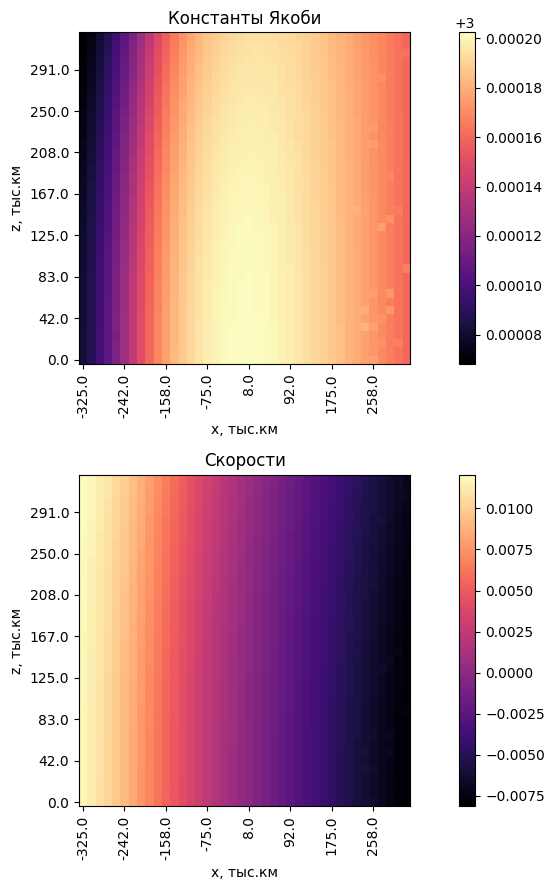

In [7]:
jac = np.load("jc40.npy")
vv = np.load("vv40.npy")
n = 40
x = np.rint((np.linspace(xmin, xmax, n) - xL1) * R / 1000)
z = np.rint((np.linspace(zmin, zmax, n)) * R / 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,9))

# Первый график
im1 = ax1.imshow(jac.T, cmap='magma', origin='lower')
ax1.set_xlabel('x, тыс.км')
ax1.set_ylabel('z, тыс.км')
ax1.set_title("Константы Якоби")
fig.colorbar(im1, ax=ax1)
ax1.set_xticks(np.arange(0, n, 5))
ax1.set_yticks(np.arange(0, n, 5))
ax1.set_xticklabels(x[::5], rotation=90)
ax1.set_yticklabels(z[::5])

# Второй график
im2 = ax2.imshow(vv.T, cmap='magma', origin='lower')
ax2.set_xlabel('x, тыс.км')
ax2.set_ylabel('z, тыс.км')
ax2.set_title("Скорости")
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0, n, 5))
ax2.set_yticks(np.arange(0, n, 5))
ax2.set_xticklabels(x[::5], rotation=90)
ax2.set_yticklabels(z[::5])

plt.tight_layout()
plt.show()

In [16]:
#80
start = time.time()

jc, vv = calculate(80, np.array([xmin, xmax]), np.array([zmin, zmax]), h, mc, n, But, bOrderMain, c, pl)
end = time.time()

np.save("jc80.npy", jc)
np.save("vv80.npy", vv)

print("Время:", end - start)

Время: 129.14186716079712


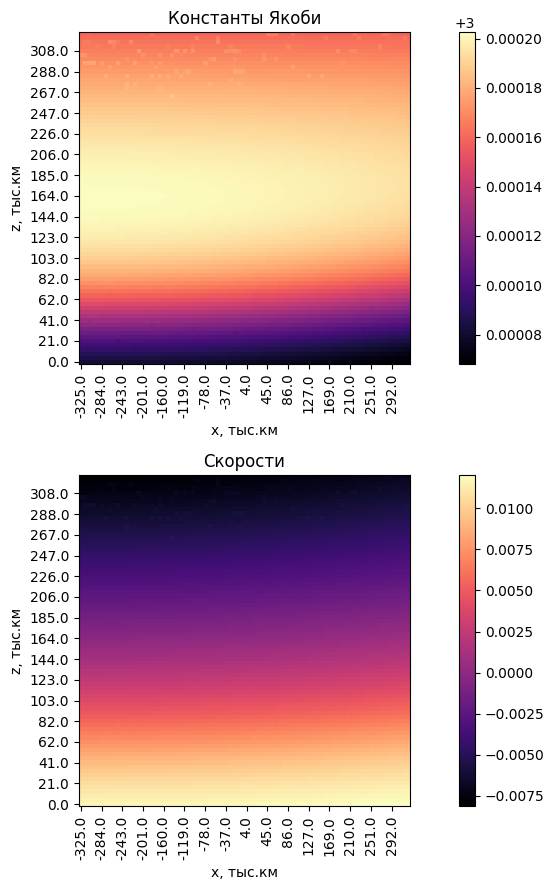

In [151]:
jac = np.load("jc80.npy")
vv = np.load("vv80.npy")
n = 80
x = np.rint((np.linspace(xmin, xmax, n) - xL1) * R / 1000)
z = np.rint((np.linspace(zmin, zmax, n)) * R / 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,9))

# Первый график
im1 = ax1.imshow(jac.T, cmap='magma', origin='lower')
ax1.set_xlabel('x, тыс.км')
ax1.set_ylabel('z, тыс.км')
ax1.set_title("Константы Якоби")
fig.colorbar(im1, ax=ax1)
ax1.set_xticks(np.arange(0, n, 5))
ax1.set_yticks(np.arange(0, n, 5))
ax1.set_xticklabels(x[::5], rotation=90)
ax1.set_yticklabels(z[::5])

# Второй график
im2 = ax2.imshow(vv.T, cmap='magma', origin='lower')
ax2.set_xlabel('x, тыс.км')
ax2.set_ylabel('z, тыс.км')
ax2.set_title("Скорости")
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0, n, 5))
ax2.set_yticks(np.arange(0, n, 5))
ax2.set_xticklabels(x[::5], rotation=90)
ax2.set_yticklabels(z[::5])

plt.tight_layout()
plt.show()

In [17]:
#160
start = time.time()

jc, vv = calculate(160, np.array([xmin, xmax]), np.array([zmin, zmax]), h, mc, n, But, bOrderMain, c, pl)
end = time.time()

np.save("jc160.npy", jc)
np.save("vv160.npy", vv)

print("Время:", end - start)

Время: 555.1383090019226


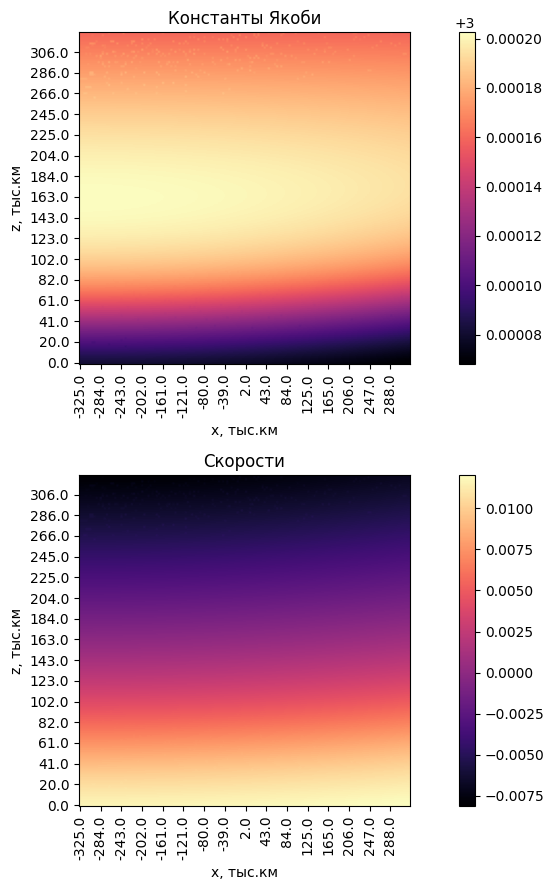

In [159]:
jac = np.load("jc160.npy")
vv = np.load("vv160.npy")
n = 160
x = np.rint((np.linspace(xmin, xmax, n) - xL1) * R / 1000)
z = np.rint((np.linspace(zmin, zmax, n)) * R / 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,9))

# Первый график
im1 = ax1.imshow(jac, cmap='magma', origin='lower')
ax1.set_xlabel('x, тыс.км')
ax1.set_ylabel('z, тыс.км')
ax1.set_title("Константы Якоби")
fig.colorbar(im1, ax=ax1)
ax1.set_xticks(np.arange(0, n, 10))
ax1.set_yticks(np.arange(0, n, 10))
ax1.set_xticklabels(x[::10], rotation=90)
ax1.set_yticklabels(z[::10])

# Второй график
im2 = ax2.imshow(vv, cmap='magma', origin='lower')
ax2.set_xlabel('x, тыс.км')
ax2.set_ylabel('z, тыс.км')
ax2.set_title("Скорости")
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0, n, 10))
ax2.set_yticks(np.arange(0, n, 10))
ax2.set_xticklabels(x[::10], rotation=90)
ax2.set_yticklabels(z[::10])

plt.tight_layout()
plt.show()

In [18]:
#320
start = time.time()

jc, vv = calculate(320, np.array([xmin, xmax]), np.array([zmin, zmax]), h, mc, n, But, bOrderMain, c, pl)
end = time.time()

np.save("jc320.npy", jc)
np.save("vv320.npy", vv)

print("Время:", end - start)

Время: 2212.930032968521


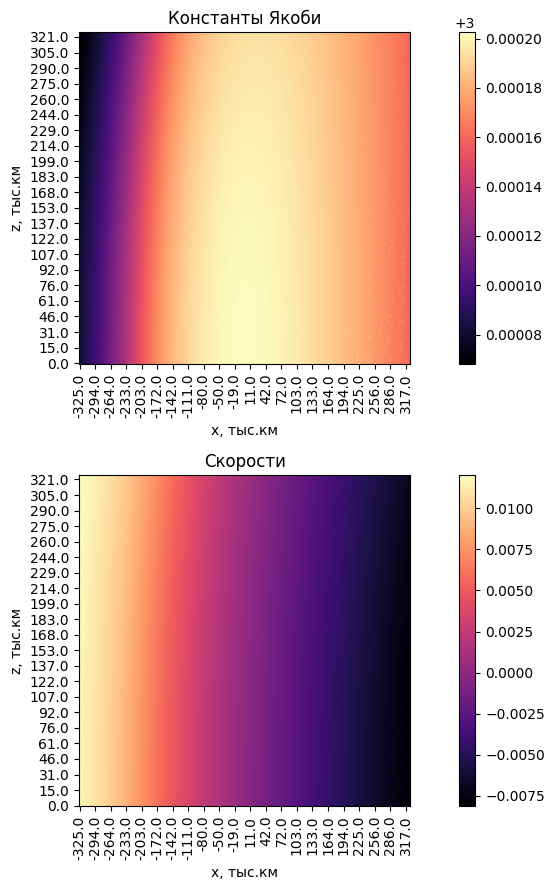

In [8]:
jac = np.load("jc320.npy")
vv = np.load("vv320.npy")
n = 320
x = np.rint((np.linspace(xmin, xmax, n) - xL1) * R / 1000)
z = np.rint((np.linspace(zmin, zmax, n)) * R / 1000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,9))

# Первый график
im1 = ax1.imshow(jac.T, cmap='magma', origin='lower')
ax1.set_xlabel('x, тыс.км')
ax1.set_ylabel('z, тыс.км')
ax1.set_title("Константы Якоби")
fig.colorbar(im1, ax=ax1)
ax1.set_xticks(np.arange(0, n, 15))
ax1.set_yticks(np.arange(0, n, 15))
ax1.set_xticklabels(x[::15], rotation=90)
ax1.set_yticklabels(z[::15])

# Второй график
im2 = ax2.imshow(vv.T, cmap='magma', origin='lower')
ax2.set_xlabel('x, тыс.км')
ax2.set_ylabel('z, тыс.км')
ax2.set_title("Скорости")
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0, n, 15))
ax2.set_yticks(np.arange(0, n, 15))
ax2.set_xticklabels(x[::15], rotation=90)
ax2.set_yticklabels(z[::15])

plt.tight_layout()
plt.show()